In [195]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=2,cluster_std=3.5,center_box=(-15.0,15.0),random_state=0)

In [125]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

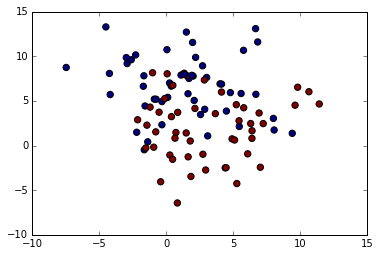

In [196]:
plt.scatter(X[:,0], X[:,1], c=y,s=40)

In [197]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [198]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [199]:
X_train.shape
y_train.shape

(75,)

In [200]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
prediction=classifier.predict(X_test)

In [202]:
classifier.score(X_test,y_test)

0.80000000000000004

In [203]:
classifier.score(X_train,y_train)

0.77333333333333332

In [162]:
import numpy as np
import matplotlib.pyplot as plt


def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['lightblue', 'mistyrose'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())




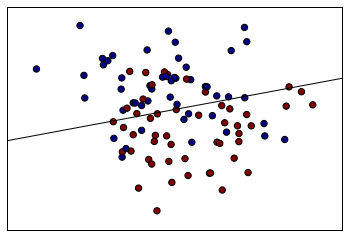

In [152]:
plt.scatter(X[:,0],X[:,1],c=y,s=40)
plot_2d_separator(classifier,X)

In [204]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
knn=KNeighborsClassifier(n_neighbors=1)

In [206]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

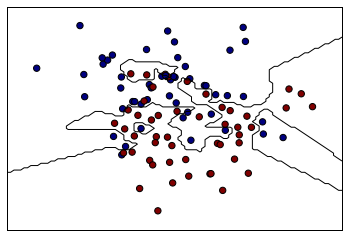

In [209]:
plt.scatter(X[:,0],X[:,1],c=y,s=40)
#plot_2d_separator(knn,X)
plot_2d_separator(knn, X)

In [21]:
from sklearn import linear_model

In [22]:
reg=linear_model.LinearRegression()

In [23]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19.
  warnings.warn(msg, category=DeprecationWarning)


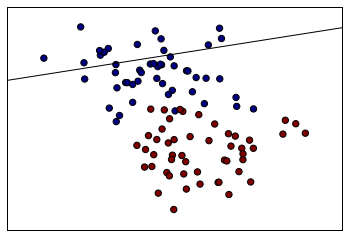

In [24]:
plt.scatter(X[:,0],X[:,1],c=y,s=40)
#plot_2d_separator(knn,X)
plot_2d_separator(reg, X)

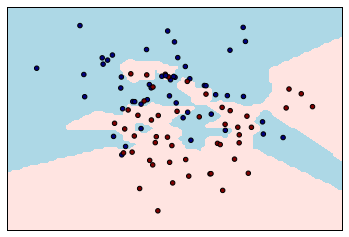

In [207]:
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


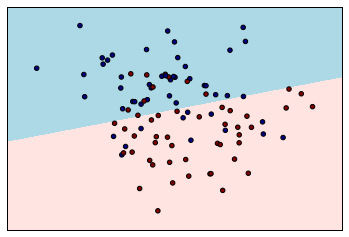

In [208]:
plot_2d_separator(classifier,X,fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [57]:
from sklearn.datasets import make_circles, make_moons

In [103]:
W,z=make_circles(noise=100,factor=1,random_state=0)

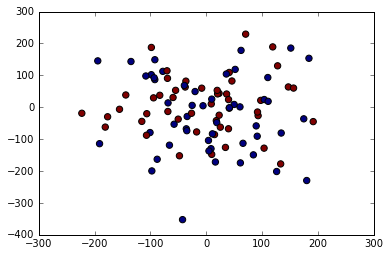

In [104]:
plt.scatter(W[:,0],W[:,1],c=y,s=40)

In [193]:
T,r=make_blobs(centers=2,cluster_std=3.5,center_box=(-15.0,15.0),random_state=0)

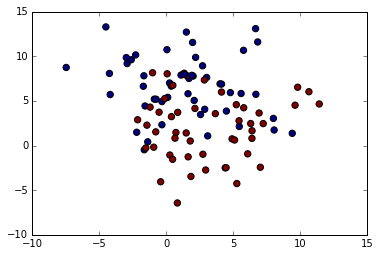

In [194]:
plt.scatter(T[:,0],T[:,1],c=y,s=40)

In [210]:
knn=KNeighborsClassifier(n_neighbors=15)

In [211]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

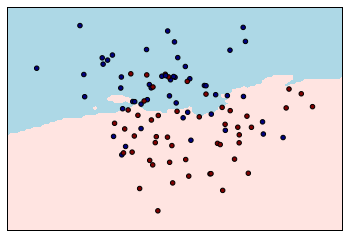

In [212]:
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()